<a href="https://colab.research.google.com/github/codesongs/codestates_TP2/blob/main/Movielens_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## 주의사항 : colab content 폴더 내부에 ratings.dat, movies.dat, users.dat 파일을 업로드 후 실행할 것

---

# 새 섹션

In [ ]:
# 데이터 가져오기
import os
import pandas as pd

def load_ratings(path):
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies(path):
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding = 'ISO-8859-1' )
    return df

def load_users(path):
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

In [ ]:
df_ratings = load_ratings('/content')
df_movies = load_movies('/content')
df_users = load_users('/content')

# 새 섹션

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_users.head()

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


##여기서부터 EDA

In [ ]:
# timestamp 기준 데이터 연도 범위 및 최신기준 시간차이 - 경욱
from datetime import datetime

mostold = df_ratings.timestamp.min()
mostnew = df_ratings.timestamp.max()
print(mostold) # 가장 오래된 평점
print('가장 오래된 평점:',datetime.utcfromtimestamp(mostold))
print(mostnew) # 가장 최신 평점
print('가장 최신 평점:',datetime.utcfromtimestamp(mostnew))

974698093.0
가장 오래된 평점: 2000-11-20 05:28:13
1046388675.0
가장 최신 평점: 2003-02-27 23:31:15


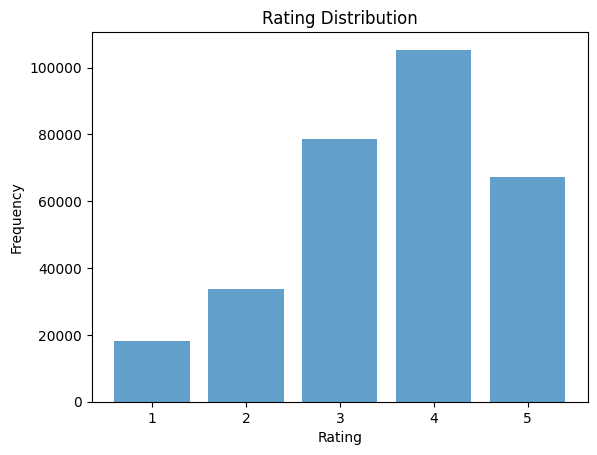

In [ ]:
# 전체 데이터 평점 분포 - 경욱

import matplotlib.pyplot as plt

# 데이터프레임에서 rating 열 선택
ratings = df_ratings['rating']

# 히스토그램 생성
plt.hist(ratings, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, alpha=0.7)

# 그래프 제목 및 레이블 설정
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# x축 레이블 설정
plt.xticks(range(1, 6))

# 그래프 보여주기
plt.show()

<ipython-input-93-8e8c639c1b60>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_age['age_group'] = pd.cut(gender_age['age'], bins=age_bins, labels=age_labels, right=False)


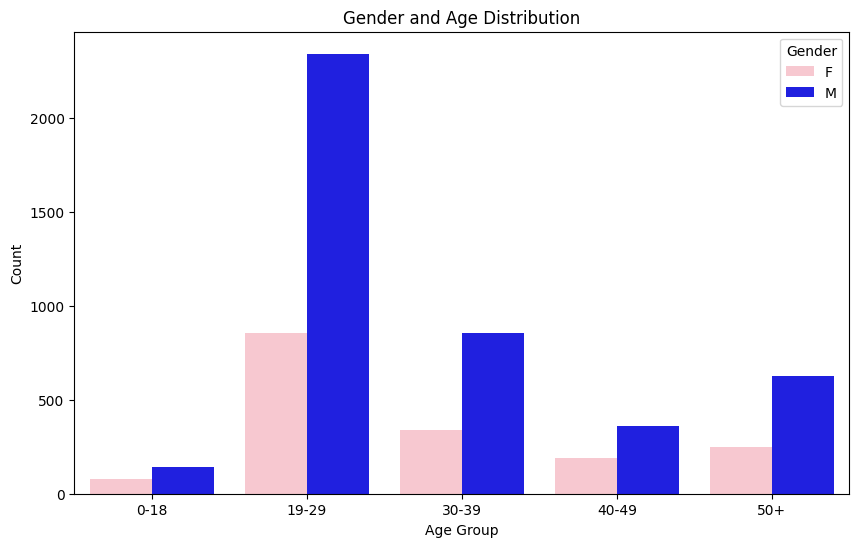

In [ ]:
# 전체 데이터 나이 분포 - 경욱 (1세~56세)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터프레임에서 'gender'와 'age' 열 선택
gender_age = df_users[['gender', 'age']]

# 나이 범주화
age_bins = [0, 18, 30, 40, 50, float('inf')]  # 50세 이상을 포함하기 위해 float('inf') 사용
age_labels = ['0-18', '19-29', '30-39', '40-49', '50+']
gender_age['age_group'] = pd.cut(gender_age['age'], bins=age_bins, labels=age_labels, right=False)

# 스택 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=gender_age, x='age_group', hue='gender', palette=['pink', 'blue'])

# 그래프 제목 및 레이블 설정
plt.title('Gender and Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 범례 표시
plt.legend(title='Gender')

# 그래프 보여주기
plt.show()


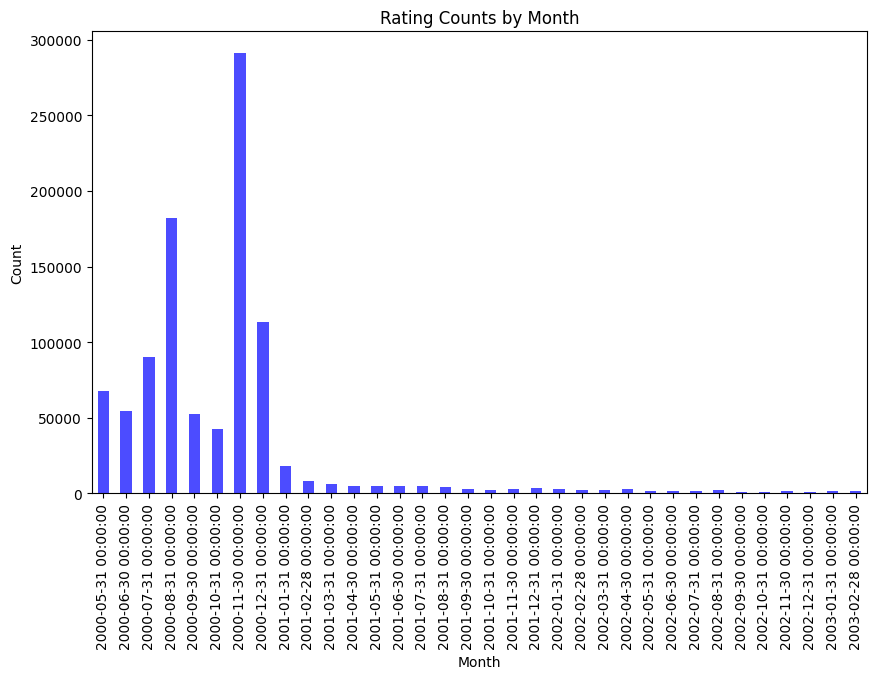

In [ ]:
# 전체 데이터 시계열 분포 - 경욱

import matplotlib.pyplot as plt
import pandas as pd

# timestamp를 날짜로 변환 (df_ratings는 변경하지 않음)
df_ratings_copy = df_ratings.copy()
df_ratings_copy['timestamp'] = pd.to_datetime(df_ratings_copy['timestamp'], unit='s')

# 데이터의 시간 범위 설정 (2000년 5월 ~ 2003년 2월)
start_date = pd.Timestamp('2000-05-01')
end_date = pd.Timestamp('2003-02-28')

# 월별로 데이터 수 계산
monthly_counts = df_ratings_copy[(df_ratings_copy['timestamp'] >= start_date) & (df_ratings_copy['timestamp'] <= end_date)].resample('M', on='timestamp').size()

# 월별 히스토그램 생성
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='blue', alpha=0.7)

# 그래프 제목 및 레이블 설정
plt.title('Rating Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# x축 레이블 설정
plt.xticks(rotation=90)

# 그래프 보여주기
plt.show()


In [ ]:
# 장르를 원핫인코딩 - 경욱

# genres 열에서 장르 분리하여 새로운 열 생성 (복사본을 만듦)
df_total_genre_encode = df_total.copy()
df_total_genre_encode['genre_list'] = df_total_genre_encode['genres'].str.split('|')

# 모든 가능한 장르 리스트 생성
all_genres = set(genre for sublist in df_total_genre_encode['genre_list'] for genre in sublist)

# 장르에 대한 원핫인코딩 생성
for genre in all_genres:
    df_total_genre_encode[genre] = df_total_genre_encode['genre_list'].apply(lambda x: 1 if genre in x else 0)

# 필요한 열만 선택하여 새로운 데이터프레임 생성
df_total_genre_encode = df_total_genre_encode[['userId', 'movieId', 'rating', 'title'] + list(all_genres)]

# 결과 확인
df_total_genre_encode

,userId,movieId,rating,title,Thriller,Fantasy,Mystery,Western,Sci-Fi,Adventure,...,Comedy,Children's,Romance,Horror,Action,Drama,Documentary,Crime,Animation,War
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,661,3,James and the Giant Peach (1996),0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,914,3,My Fair Lady (1964),0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,3408,4,Erin Brockovich (2000),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2355,5,"Bug's Life, A (1998)",0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,Weekend at Bernie's (1989),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,"Crying Game, The (1992)",0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1000206,6040,562,5,Welcome to the Dollhouse (1995),0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1000207,6040,1096,4,Sophie's Choice (1982),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


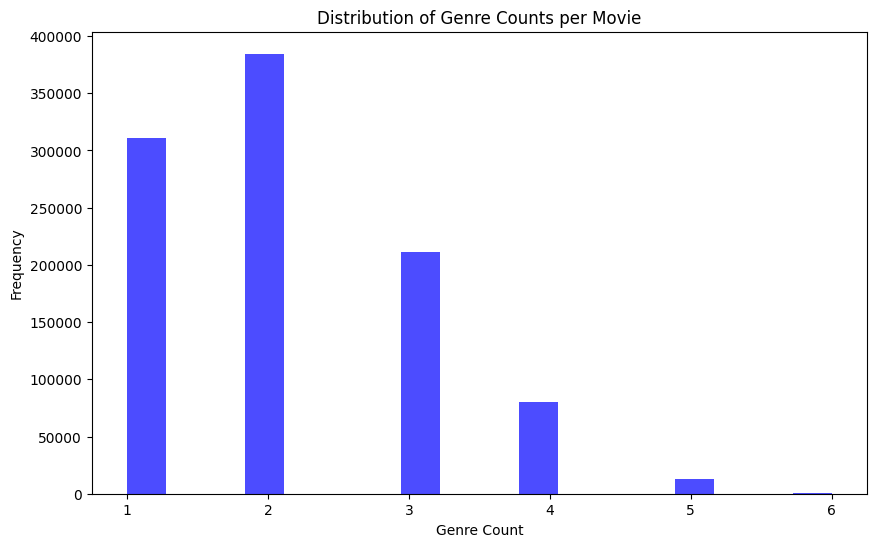

In [ ]:
# 한 영화당 최대 장르 수 분포 - 경욱 (6개짜리 영화도 가능)

import matplotlib.pyplot as plt

# 장르 수 계산
genre_counts = df_total_genre_encode[list(all_genres)].sum(axis=1)

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(genre_counts, bins=len(all_genres), color='blue', alpha=0.7)

# 그래프 제목 및 레이블 설정
plt.title('Distribution of Genre Counts per Movie')
plt.xlabel('Genre Count')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()

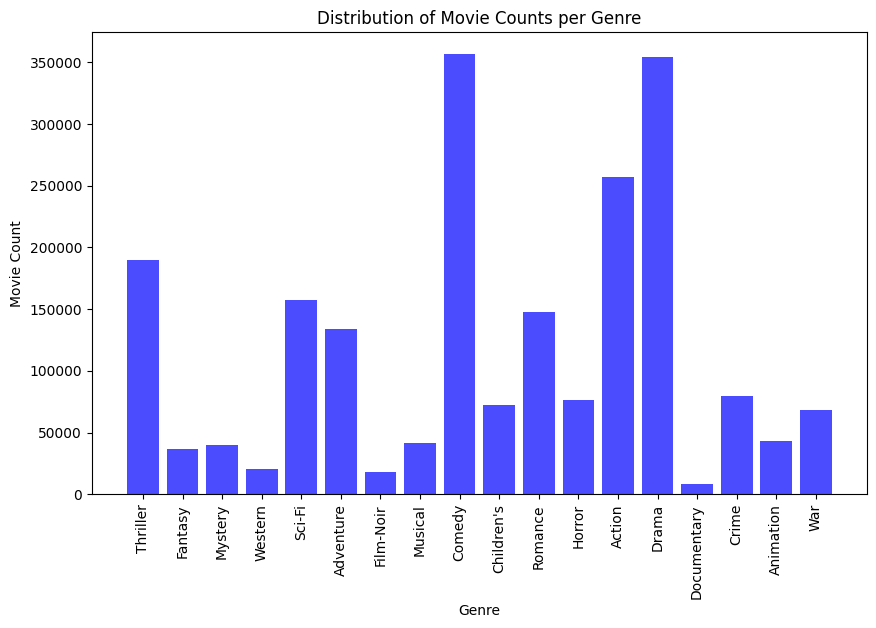

In [ ]:
 # 각 장르별 영화 개수 - 경욱

import matplotlib.pyplot as plt

# 각 장르별 영화 개수 계산
genre_movie_counts = df_total_genre_encode[list(all_genres)].sum()

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='blue', alpha=0.7)

# 그래프 제목 및 레이블 설정
plt.title('Distribution of Movie Counts per Genre')
plt.xlabel('Genre')
plt.ylabel('Movie Count')

# x축 레이블 설정
plt.xticks(rotation=90)

# 그래프 보여주기
plt.show()


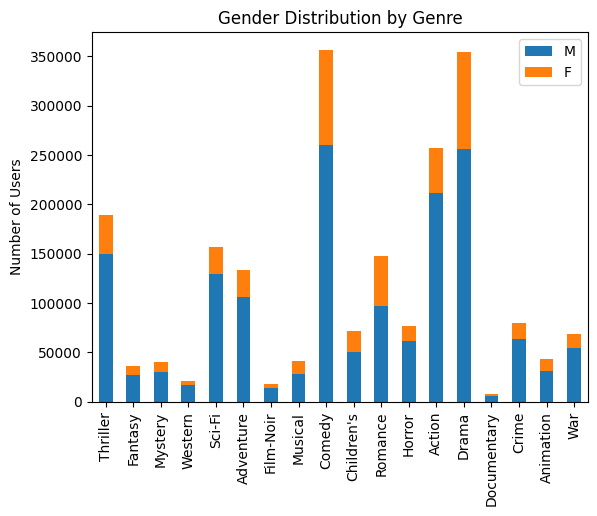

In [ ]:
# 각 장르별 성비분포 - 경욱

import pandas as pd
import matplotlib.pyplot as plt

# df_total과 df_total_genre_encode를 합치기
df_total_genre_analysis = df_total.merge(df_total_genre_encode, on=['userId', 'movieId', 'rating', 'title'])

# 필요한 컬럼만 선택
df_analysis = df_total_genre_analysis[['userId', 'movieId', 'rating', 'title', 'gender', 'age'] + list(all_genres)].copy()

genres = df_analysis.columns[6:]

gender_dist_by_genre = {}

for genre in genres:
    gender_count = df_analysis[df_analysis[genre] == 1]['gender'].value_counts()
    gender_dist_by_genre[genre] = gender_count

gender_df = pd.DataFrame(gender_dist_by_genre).transpose()
gender_df.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Genre')
plt.ylabel('Number of Users')
plt.show()


In [ ]:
# 성별에 따른 장르 선호 변화 - 경욱

for genre in genres:
    genre_df = df_analysis[df_analysis[genre] == 1]
    genre_gender_count = genre_df['gender'].value_counts()

    if 'M' not in genre_gender_count:
        genre_gender_count['M'] = 0
    if 'F' not in genre_gender_count:
        genre_gender_count['F'] = 0

    total_genre_users = genre_gender_count.sum()

    gender_dist_by_genre[genre] = {
        'Male': genre_gender_count['M'],
        'Female': genre_gender_count['F'],
        'Male Ratio': genre_gender_count['M'] / total_genre_users,
        'Female Ratio': genre_gender_count['F'] / total_genre_users
    }

gender_ratio_df = pd.DataFrame(gender_dist_by_genre).transpose()

# 'Male Ratio' 열을 기준으로 내림차순 정렬
gender_ratio_df.sort_values(by='Male Ratio', ascending=False)

# Documentary부터 남자 선호, Mystery 아래는 여자 선호 라고 할 수 있다. (총 성비 기준 남성 75.4%)

,Male,Female,Male Ratio,Female Ratio
Western,17206.0,3477.0,0.831891,0.168109
Sci-Fi,129894.0,27400.0,0.825804,0.174196
Action,211807.0,45650.0,0.822689,0.177311
Horror,61751.0,14635.0,0.808407,0.191593
Adventure,106621.0,27332.0,0.795958,0.204042
War,54434.0,14093.0,0.794344,0.205656
Crime,63099.0,16442.0,0.793289,0.206711
Thriller,149372.0,40308.0,0.787495,0.212505
Film-Noir,14059.0,4202.0,0.769892,0.230108
Fantasy,27583.0,8718.0,0.759841,0.240159


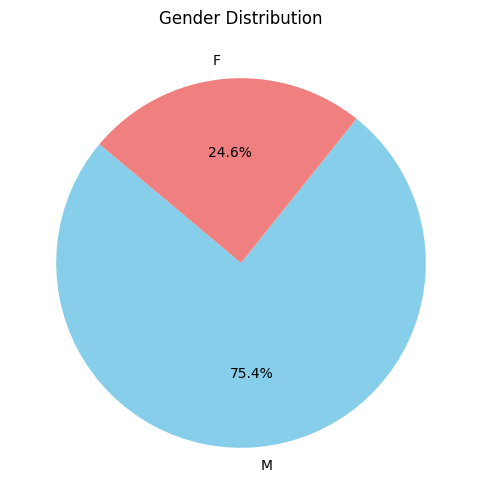

In [ ]:
info = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.info' , sep=" ", header = None)
info.columns = ['Counts' , 'Type']

occupation = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.occupation' , header = None)
occupation.columns = ['Occupations']

items = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.item' , header = None , sep = "|" , encoding='latin-1')
items.columns = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
              'Thriller' , 'War' , 'Western']

data = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.data', header= None , sep = '\t')
user = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.user', header= None , sep = '|')
genre = pd.read_csv('../input/movielens-100k-dataset/ml-100k/u.genre', header= None , sep = '|' )

genre.columns = ['Genre' , 'genre_id']
data.columns = ['user id' , 'movie id' , 'rating' , 'timestamp']
user.columns = ['user id' , 'age' , 'gender' , 'occupation' , 'zip code']

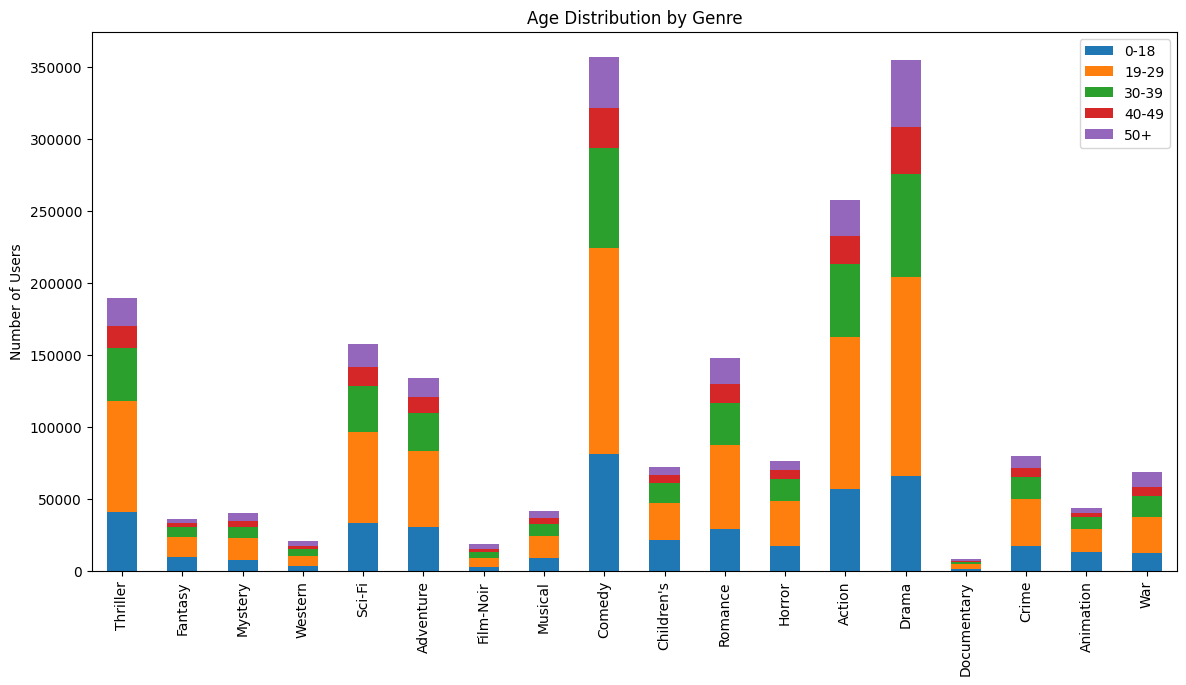

In [ ]:
# 장르별 나이대 분포 - 경욱

def age_to_label(age):
    if age <= 18:
        return '0-18'
    elif 19 <= age <= 29:
        return '19-29'
    elif 30 <= age <= 39:
        return '30-39'
    elif 40 <= age <= 49:
        return '40-49'
    else:
        return '50+'

df_analysis['age_label'] = df_analysis['age'].apply(age_to_label)

import pandas as pd
import matplotlib.pyplot as plt

age_dist_by_genre = {}

for genre in genres:
    age_label_count = df_analysis[df_analysis[genre] == 1]['age_label'].value_counts()
    age_dist_by_genre[genre] = age_label_count

age_df = pd.DataFrame(age_dist_by_genre).transpose()
age_df = age_df[['0-18', '19-29', '30-39', '40-49', '50+']]  # 순서 정렬
age_df.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Age Distribution by Genre')
plt.ylabel('Number of Users')
plt.show();


In [ ]:
# 장르별 나이대 분포 df - 경욱

age_dist_by_genre = {}

for genre in genres:
    age_label_count = df_analysis[df_analysis[genre] == 1]['age_label'].value_counts()
    total_genre_users = len(df_analysis[df_analysis[genre] == 1])
    age_dist_by_genre[genre] = age_label_count / total_genre_users * 100

df_genre_age_ratio = pd.DataFrame(age_dist_by_genre).transpose()
df_genre_age_ratio = df_genre_age_ratio[['0-18', '19-29', '30-39', '40-49', '50+']]  # 순서 정렬

'''
기준점 = 0-18  : 21.1%
         19-29 : 39.5%
         29-39 : 19.9%
         39-49 : 8.4%
         50+   : 11.1%
'''

df_genre_age_ratio

# '0-18' 열을 기준으로 내림차순 정렬 = 이 방식을 사용해 각 나이대별 정렬 가능
# gender_ratio_df.sort_values(by='0-18', ascending=False)

'''
Age :  다음과 같은 방식으로 표기
	*  1:  "18살 미만"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
'''

,0-18,19-29,30-39,40-49,50+
Thriller,21.457718,40.820856,19.422185,7.872733,10.426508
Fantasy,25.440071,39.365307,19.299744,7.424038,8.470841
Mystery,18.221415,37.732092,20.356912,9.584847,14.104734
Western,15.461974,34.100469,21.979403,10.312817,18.145337
Sci-Fi,21.113965,40.151563,20.555775,8.290208,9.888489
Adventure,22.636298,39.292140,19.918927,8.016245,10.136391
Film-Noir,14.292755,35.808554,22.862932,10.185642,16.850118
Musical,22.155876,35.405581,21.057954,9.385308,11.995281
Comedy,22.755623,40.162095,19.418924,7.821527,9.841831
Children's,29.453080,35.662040,19.399884,7.480675,8.004322


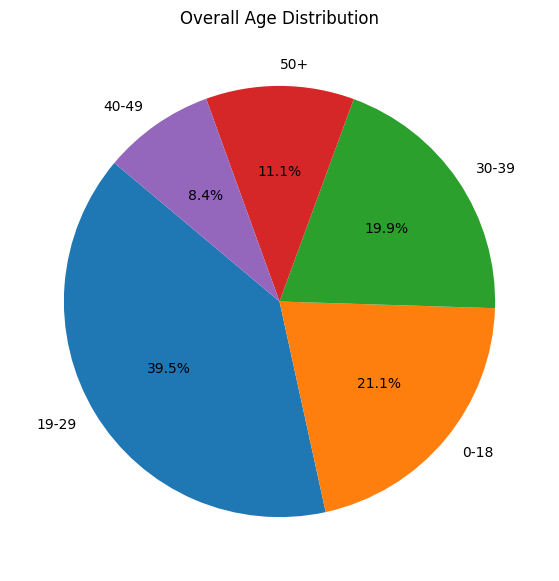

In [ ]:
# 전체 데이터의 나이분포 - 경욱

# 전체 나이대별 분포 얻기
age_label_counts = df_analysis['age_label'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 7))
age_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Overall Age Distribution')
plt.ylabel('')  # y 레이블을 삭제하여 차트를 깔끔하게 만듭니다.
plt.show()


1. 애니메이션은 다른 장르에 비해서 좀 매니아층이 많은가?  
장르를 원핫인코딩해요. 장르벡터(원핫) -> 임베딩을 할 수 있으면 해서  
장르간 상관관계? 를 확인하는거에요  

영화1 칠드런, 애니메이션, 코믹
영화2 느와르 , SF, 액션  
영화3 판타지, 전쟁   
...
한 영화에 자주 같이 묶이는 장르일수록 장르간 상관관계가 높다. corr? 코사인유사도? knn? 클러스터링(k값을 조절)  
계산할 때 **원핫인코딩벡터** 사용 or **임베딩 벡터** 사용

유저1 칠드런, 애니메이션 | SF, 판타지 | .... -> 각 유저내에서 장르의 빈도?   
ex) 판타지5개 칠드런3개 -> 판타지가중치5 칠드런가중치3 인 영화를 추천  
유저2 느와르, 액션 | .... 전쟁 | 서부극 -> 액션물을 좋아하면 전쟁 서부극을 좋아할 수 있다

결론 : 유저와 관계없이, 판타지 영화를 좋아하는 사람이 있다면 그에게 어떤 기준으로 추천해 줄 것인가? 평점 or 최신트렌드(CTR) (최신 = timestamp)
만약 장르가 아니라 나이, 성별로 학습한거라면  
결론 : 유저와 관계없이, 남성, 25세면 어떠어떠한 영화를 좋아하더라.

2. 영화에 연도표기  
장르별 영화 연도분포?를 한번 확인  
예시) 느와르 -> 나이많은 사람들이 즐겨본다.
영화 연도분포와 시청연령 및 나이대별 평점 패턴

3. 직업(ex.수입별 분류), 우편번호(미국 51개주로 분류) = X 일단 제외



